In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# imports
from pathlib import Path  # noqa: F401
import pandas as pd  # noqa: F401
from pyam import IamDataFrame, Statistics, filter_by_meta  # noqa: F401
import requests  # noqa: F401
import numpy as np  # noqa: F401
import matplotlib.pyplot as plt  # noqa: F401
import seaborn as sns  # noqa: F401

import sys

sys.path.append("../src/")

[WARNING] 17:01:25 - pint.util: Redefining 'kt' (<class 'pint.delegates.txt_defparser.plain.UnitDefinition'>)
[WARNING] 17:01:25 - pint.util: Redefining 'EUR_2005' (<class 'pint.delegates.txt_defparser.plain.UnitDefinition'>)
[WARNING] 17:01:25 - pint.util: Redefining 'EUR' (<class 'pint.delegates.txt_defparser.plain.UnitDefinition'>)


In [4]:
from src.iasa.iiasa_client import IIASABaseAPIClient
from src.iasa.utils import create_iamdf, create_df_from_api_response

client = IIASABaseAPIClient()

### API exploration

In [5]:
# explore variables
variables = create_df_from_api_response(
    client.get_data(
        "iamc/variables/",
        params={"table": "true"},
    )
)

variables


KeyboardInterrupt: 

In [7]:
variables[
    variables["name"].str.contains("Hunger", case=False)
    | variables["name"].str.contains("biodiversity", case=False)
    ]

,name,id,created_at,created_by
170,Population|Risk of Hunger,171,2025-03-28T12:04:32.245190,@unknown
1065,Terrestrial Biodiversity|Shannon Crop Diversit...,1066,2025-04-07T11:32:05.677782,@unknown
1169,Terrestrial Biodiversity|Biodiversity Intactne...,1170,2025-04-09T07:54:50.497128,@unknown
1170,Terrestrial Biodiversity|Mean Species Abundanc...,1171,2025-04-09T07:54:50.544049,@unknown


In [8]:
## variables categorization and groups
categories = variables.name.str.split("|", expand=True)
categories.sort_values(by=[0, 1], inplace=True)
categories = categories.rename(columns={0: "category", 1: "sub_category"})
categories

,category,sub_category,2,3,4,5
290,Agricultural Demand,Crops,Bioenergy,None,None,None
291,Agricultural Demand,Crops,Bioenergy,1st Generation,None,None
292,Agricultural Demand,Crops,Bioenergy,2nd Generation,None,None
1067,Agricultural Demand,Crops,None,None,None,None
1068,Agricultural Demand,Crops,Feed,None,None,None
...,...,...,...,...,...,...
1177,Water Withdrawal,Municipal Water,None,None,None,None
649,Water Withdrawal,None,None,None,None,None
672,Yield,Cropland,Cereals,None,None,None
673,Yield,Cropland,Oil Crops,None,None,None


In [9]:
categories.category.unique()

array(['Agricultural Demand',
       'Agricultural Material Footprint [per capita]',
       'Agricultural Production', 'Capacity', 'Capacity Additions',
       'Capital Cost', 'Capital Formation', 'Capital Stock',
       'Carbon Capture', 'Carbon Removal', 'Climate Assessment',
       'Consumption', 'Efficiency', 'Emissions', 'Energy Service',
       'Expenditure', 'Fertilizer Use', 'Final Energy',
       'Final Energy (w/o bunkers)', 'Forestry Demand',
       'Forestry Production', 'Freshwater', 'GDP', 'Gross Emissions',
       'Health', 'Income', 'Inequality', 'Investment', 'Labor Force',
       'Land Cover', 'Lifetime', 'Policy Cost', 'Pollution', 'Population',
       'Price', 'Primary Energy', 'Production', 'Resource',
       'Secondary Energy', 'Terrestrial Biodiversity', 'Trade',
       'Value Added', 'Water Consumption', 'Water Quality',
       'Water Withdrawal', 'Yield'], dtype=object)

In [ ]:
# create_df_from_api_response(
#     client.get_data(
#         "meta/",
#         params={"join_run_index": "true", "table": "true"},
#         body={"run": {"default_only": False}},
#     )
# )
# metaindicators.reset_index().scenario.unique()


array(['ENGAGE-INDCi2030-1000f', 'ENGAGE-INDCi2030-1200',
       'ENGAGE-INDCi2030-1200f', 'ENGAGE-INDCi2030-1400',
       'ENGAGE-INDCi2030-1400f', 'ENGAGE-INDCi2030-1600',
       'ENGAGE-INDCi2030-1600f', 'ENGAGE-INDCi2030-1800',
       'ENGAGE-INDCi2030-1800f', 'ENGAGE-INDCi2030-800f',
       'ENGAGE-INDCi2030-900f', 'ENGAGE-INDCi2100', 'ENGAGE-NPi2020-1000',
       'ENGAGE-NPi2020-1000f', 'ENGAGE-NPi2020-1200',
       'ENGAGE-NPi2020-1200f', 'ENGAGE-NPi2020-1400',
       'ENGAGE-NPi2020-1400f', 'ENGAGE-NPi2020-1600',
       'ENGAGE-NPi2020-1600f', 'ENGAGE-NPi2020-1800',
       'ENGAGE-NPi2020-1800f', 'ENGAGE-NPi2020-300f',
       'ENGAGE-NPi2020-400f', 'ENGAGE-NPi2020-500f', 'ENGAGE-NPi2020-600',
       'ENGAGE-NPi2020-600f', 'ENGAGE-NPi2020-700', 'ENGAGE-NPi2020-700f',
       'ENGAGE-NPi2020-800', 'ENGAGE-NPi2020-800f', 'ENGAGE-NPi2020-900',
       'ENGAGE-NPi2020-900f', 'ENGAGE-NPi2100', 'ENGAGE-INDCi2030-1000',
       'ENGAGE-INDCi2030-1000-COV', 'ENGAGE-INDCi2030-1000-COV-NDCp'

In [8]:
# explore meta indicators
metaindicators = create_df_from_api_response(
    client.get_data(
        "meta/",
        params={"join_run_index": "false", "table": "true"},
        body={"run": {"default_only": False}},
    )
)

metaindicators

,run__id,key,id,value,type
0,1,Project,1,H2020 ENGAGE,STR
1,1,Scientific Manuscript (Citation),2,Riahi et al. (2021),STR
2,1,Scientific Manuscript (DOI),3,10.1038/s41558-021-01215-2,STR
3,1,Data Source (DOI),4,10.5281/zenodo.5553976,STR
4,2,Project,5,H2020 ENGAGE,STR
...,...,...,...,...,...
49995,1011,Climate Assessment|Year of Peak Warming|67th P...,84278,2069.0,INT
49996,1011,Climate Assessment|Year of Peak Warming|75th P...,84279,2070.0,INT
49997,1011,Climate Assessment|Year of Peak Warming|83th P...,84280,2082.0,INT
49998,1011,Climate Assessment|Year of Peak Warming|90th P...,84281,2093.0,INT


In [13]:
metaindicators.model.unique()


array(['AIM/CGE V2.2', 'MESSAGEix-GLOBIOM 1.1', 'IMAGE 3.0', 'WITCH 5.0',
       'COFFEE 1.1', 'GEM-E3 V2021', 'POLES-JRC ENGAGE',
       'REMIND-MAgPIE 2.1-4.2', 'TIAM-ECN 1.1', 'REMIND 3.0',
       'PROMETHEUS V1', 'COFFEE 1.5', 'MESSAGEix-GLOBIOM 1.1-BMT-R12',
       'IMACLIM 2.0', 'MESSAGEix-GLOBIOM 1.1-BM-R12', 'ODYM-RECC 2.5',
       'REMIND-MAgPIE 3.2-4.6', 'GCAM 6.0 NGFS',
       'MESSAGEix-GLOBIOM 2.0-M-R12-NGFS', 'REMIND-MAgPIE 3.3-4.8',
       'IMAGE 3.3'], dtype=object)

In [11]:
metaindicators[metaindicators["key"].str.contains("Name")].value.unique()

array(['C3: Likely below 2°C', 'C4: Below 2°C', 'C5: Below 2.5°C',
       'C6: Below 3.0°C', 'C1b: Below 1.5°C with low OS',
       'C2: Below 1.5°C with high OS', 'C7: Below 4.0°C'], dtype=object)

In [12]:
metaindicators[metaindicators["key"].str.contains("Peak Warming")].value.unique()


array([1.363005605076402, 1.457082683960506, 1.542026347481938, ...,
       1.818705129741388, 1.937520556952889, 2.034847000532907],
      dtype=object)

In [13]:
metaindicators[metaindicators["key"].str.contains("Year of Peak Warming")].value.unique()


array([2048.0, 2049.0, 2059.0, 2068.0, 2069.0, 2070.0, 2060.0, 2094.0,
       2100.0, 2061.0, 2081.0, 2093.0, 2082.0, 2083.0, 2071.0, 2050.0,
       2058.0, 2038.0, 2037.0, 2047.0, 2057.0, 2080.0, 2084.0, 2095.0,
       2072.0, 2079.0, 2092.0, 2098.0, 2040.0, 2062.0, 2051.0, 2077.0,
       2064.0, 2073.0, 2036.0, 2039.0, 2035.0, 2045.0, 2099.0, 2046.0,
       2041.0, 2044.0, 2066.0, 2096.0, 2026.0, 2027.0, 2028.0, 2086.0,
       2076.0, 2074.0, 2078.0, 2085.0, 2090.0, 2091.0, 2063.0, 2042.0,
       2052.0, 2089.0, 2067.0, 2054.0, 2034.0, 2031.0], dtype=object)

In [14]:
metaindicators


,model,scenario,version,key,id,value,type
0,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,Project,1,H2020 ENGAGE,STR
1,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,Scientific Manuscript (Citation),2,Riahi et al. (2021),STR
2,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,Scientific Manuscript (DOI),3,10.1038/s41558-021-01215-2,STR
3,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,Data Source (DOI),4,10.5281/zenodo.5553976,STR
4,AIM/CGE V2.2,ENGAGE-INDCi2030-1200,1,Project,5,H2020 ENGAGE,STR
...,...,...,...,...,...,...,...
35540,IMAGE 3.3,SHAPE-SSP2-1.5°C,1,Climate Assessment|Category [Name],61291,C1b: Below 1.5°C with low OS,STR
35541,IMAGE 3.3,SHAPE-SSP2-1.5°C,1,Climate Assessment|Processing|Harmonization,61292,aneris (version: 0.3.1),STR
35542,IMAGE 3.3,SHAPE-SSP2-1.5°C,1,Climate Assessment|Processing|Infilling,61293,silicone (version: 1.3.0),STR
35543,IMAGE 3.3,SHAPE-SSP2-1.5°C,1,Climate Assessment|Processing|Runner,61294,openscm_runner (version: 0.12.1),STR


In [15]:
data = create_df_from_api_response(
    client.get_data(
        "iamc/datapoints/",
        params={"join_parameters": "true", "join_runs": "true", "table": "true"},
        body={
            "run": {"id__in": [1, 2]},
            "variable": {"name__in": ["Agricultural Demand"]},
            "region": {"name__in": ["World"]},
        },
    )
)

data

,model,scenario,version,region,unit,variable,value,type,step_year,time_series__id,id
14,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,World,million t DM/yr,Agricultural Demand,2729.9307,ANNUAL,2010,3026,57490
11,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,World,million t DM/yr,Agricultural Demand,3179.6320,ANNUAL,2015,3026,57487
9,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,World,million t DM/yr,Agricultural Demand,3515.3886,ANNUAL,2020,3026,57485
13,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,World,million t DM/yr,Agricultural Demand,3804.1290,ANNUAL,2025,3026,57489
18,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,World,million t DM/yr,Agricultural Demand,4010.6738,ANNUAL,2030,3026,57494
15,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,World,million t DM/yr,Agricultural Demand,4183.8337,ANNUAL,2035,3026,57491
16,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,World,million t DM/yr,Agricultural Demand,4621.8576,ANNUAL,2040,3026,57492
17,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,World,million t DM/yr,Agricultural Demand,5003.9216,ANNUAL,2045,3026,57493
10,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,World,million t DM/yr,Agricultural Demand,5362.0102,ANNUAL,2050,3026,57486
12,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,1,World,million t DM/yr,Agricultural Demand,6090.5268,ANNUAL,2055,3026,57488


### Visualization exploration

This section will focus on some variables to explore possible visualizations that can be done with the data.

In [12]:
def reshape_summary_data(df):
    """
    Reshape the summary data to a long format.
    """
    columns = df.columns.values
    data = df.copy().assign(variables=df.index).reset_index()
    return data.melt(
        id_vars=["variables"],
        value_vars=columns,
        var_name="year",
        value_name="value",
    ).dropna()

In [ ]:
def filters_by_reasons_of_concern(reasons_of_concern):
    """
    Generate filters to fecth scenarios by reasons of concern.
    """
    filters_body = []
    filters_meta = []
    for reason in reasons_of_concern:
        if reason == "Peak Warming":
            filters_body.append({"key": "Peak Warming", "value__isnull": False})

    return filters_body, filters_meta


def build_criterias():
    return None


def get_data_for_variables_and_regions(variables, regions, reasons_of_concern=None):
    """
    Get scenarios for a specific variable and region.
    """
    body = {
        "variable": {"name__in": variables},
        "region": {"name__in": regions},
    }

    if reasons_of_concern:
        filters_body, filters_meta = filters_by_reasons_of_concern(reasons_of_concern)
        body.update({"meta": {"key__in": [f["key"] for f in filters_body]}})

    metaindicators = create_df_from_api_response(
        client.get_data(
            "meta/",
            params={"join_run_index": "true", "table": "true"},
            body={"run": {"default_only": False}},
        )
    )

    return create_iamdf(
        create_df_from_api_response(
            client.get_data(
                "iamc/datapoints/",
                params={"join_parameters": "true", "join_runs": "true", "table": "true"},
                body=body,
            )
        ),
        metaindicators=metaindicators,
    )

In [ ]:
metaindicators


version  \
model        scenario                          
AIM/CGE V2.2 ENGAGE-INDCi2030-1000f        1   
             ENGAGE-INDCi2030-1000f        1   
             ENGAGE-INDCi2030-1000f        1   
             ENGAGE-INDCi2030-1000f        1   
             ENGAGE-INDCi2030-1200         1   
...                                      ...   
IMAGE 3.3    SHAPE-SSP2-1.5°C              1   
             SHAPE-SSP2-1.5°C              1   
             SHAPE-SSP2-1.5°C              1   
             SHAPE-SSP2-1.5°C              1   
             SHAPE-SSP2-1.5°C              1   

                                                                             key  \
model        scenario                                                              
AIM/CGE V2.2 ENGAGE-INDCi2030-1000f                                      Project   
             ENGAGE-INDCi2030-1000f             Scientific Manuscript (Citation)   
             ENGAGE-INDCi2030-1000f                  Scientific Manuscript (DOI)   
             ENGAGE-INDCi2030-1000f                            Data Source (DOI)   
             ENGAGE-INDCi2030-1200                                       Project   
...                                                                          ...   
IMAGE 3.3    SHAPE-SSP2-1.5°C                 Climate Assessment|Category [Name]   
             SHAPE-SSP2-1.5°C        Climate Assessment|Processing|Harmonization   
             SHAPE-SSP2-1.5°C            Climate Assessment|Processing|Infilling   
             SHAPE-SSP2-1.5°C               Climate Assessment|Processing|Runner   
             SHAPE-SSP2-1.5°C              Climate Assessment|Processing|Package   

                                        id  \
model        scenario                        
AIM/CGE V2.2 ENGAGE-INDCi2030-1000f      1   
             ENGAGE-INDCi2030-1000f      2   
             ENGAGE-INDCi2030-1000f      3   
             ENGAGE-INDCi2030-1000f      4   
             ENGAGE-INDCi2030-1200       5   
...                                    ...   
IMAGE 3.3    SHAPE-SSP2-1.5°C        61291   
             SHAPE-SSP2-1.5°C        61292   
             SHAPE-SSP2-1.5°C        61293   
             SHAPE-SSP2-1.5°C        61294   
             SHAPE-SSP2-1.5°C        61295   

                                                                     value  \
model        scenario                                                        
AIM/CGE V2.2 ENGAGE-INDCi2030-1000f                           H2020 ENGAGE   
             ENGAGE-INDCi2030-1000f                    Riahi et al. (2021)   
             ENGAGE-INDCi2030-1000f             10.1038/s41558-021-01215-2   
             ENGAGE-INDCi2030-1000f                 10.5281/zenodo.5553976   
             ENGAGE-INDCi2030-1200                            H2020 ENGAGE   
...                                                                    ...   
IMAGE 3.3    SHAPE-SSP2-1.5°C                 C1b: Below 1.5°C with low OS   
             SHAPE-SSP2-1.5°C                      aneris (version: 0.3.1)   
             SHAPE-SSP2-1.5°C                    silicone (version: 1.3.0)   
             SHAPE-SSP2-1.5°C             openscm_runner (version: 0.12.1)   
             SHAPE-SSP2-1.5°C        climate-assessment (version: 0.1.4a0)   

                                    type  
model        scenario                     
AIM/CGE V2.2 ENGAGE-INDCi2030-1000f  STR  
             ENGAGE-INDCi2030-1000f  STR  
             ENGAGE-INDCi2030-1000f  STR  
             ENGAGE-INDCi2030-1000f  STR  
             ENGAGE-INDCi2030-1200   STR  
...                                  ...  
IMAGE 3.3    SHAPE-SSP2-1.5°C        STR  
             SHAPE-SSP2-1.5°C        STR  
             SHAPE-SSP2-1.5°C        STR  
             SHAPE-SSP2-1.5°C        STR  
             SHAPE-SSP2-1.5°C        STR  

[35545 rows x 5 columns]

In [13]:
data.filter(variable="Agricultural Demand", region="World")


<class 'pyam.core.IamDataFrame'>
Index:
 * model           : AIM/CGE V2.2, GCAM 6.0 NGFS, IMAGE 3.0, ... WITCH 5.0 (11)
 * scenario        : ENGAGE-INDCi2030-1000, ... SHAPE-SSP2-1.5°C (225)
Timeseries data coordinates:
   region          : World (1)
   variable        : Agricultural Demand (1)
   unit            : million t DM/yr (1)
   year            : 1990, 1995, 2000, 2005, 2010, 2015, 2020, ... 2110 (24)
   version         : 1 (1)
   type            : ANNUAL (1)
   time_series__id : 3026, 6273, 9520, 12767, 16014, 19261, ... 4449465 (471)

In [14]:
data.filter(variable="Agricultural Demand").data

,model,scenario,region,variable,unit,year,version,type,time_series__id,value
0,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,World,Agricultural Demand,million t DM/yr,2010,1,ANNUAL,3026,2729.930700
1,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,World,Agricultural Demand,million t DM/yr,2015,1,ANNUAL,3026,3179.632000
2,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,World,Agricultural Demand,million t DM/yr,2020,1,ANNUAL,3026,3515.388600
3,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,World,Agricultural Demand,million t DM/yr,2025,1,ANNUAL,3026,3804.129000
4,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,World,Agricultural Demand,million t DM/yr,2030,1,ANNUAL,3026,4010.673800
...,...,...,...,...,...,...,...,...,...,...
8202,WITCH 5.0,NAVIGATE Demand-NPi-tec,World,Agricultural Demand,million t DM/yr,2080,1,ANNUAL,2798943,6319.442477
8203,WITCH 5.0,NAVIGATE Demand-NPi-tec,World,Agricultural Demand,million t DM/yr,2085,1,ANNUAL,2798943,6404.990193
8204,WITCH 5.0,NAVIGATE Demand-NPi-tec,World,Agricultural Demand,million t DM/yr,2090,1,ANNUAL,2798943,6448.801891
8205,WITCH 5.0,NAVIGATE Demand-NPi-tec,World,Agricultural Demand,million t DM/yr,2095,1,ANNUAL,2798943,6422.047257


In [17]:
data.filter(variable="Agricultural Demand").data


,model,scenario,region,variable,unit,year,version,type,time_series__id,value
0,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,World,Agricultural Demand,million t DM/yr,2010,1,ANNUAL,3026,2729.930700
1,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,World,Agricultural Demand,million t DM/yr,2015,1,ANNUAL,3026,3179.632000
2,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,World,Agricultural Demand,million t DM/yr,2020,1,ANNUAL,3026,3515.388600
3,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,World,Agricultural Demand,million t DM/yr,2025,1,ANNUAL,3026,3804.129000
4,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,World,Agricultural Demand,million t DM/yr,2030,1,ANNUAL,3026,4010.673800
...,...,...,...,...,...,...,...,...,...,...
8202,WITCH 5.0,NAVIGATE Demand-NPi-tec,World,Agricultural Demand,million t DM/yr,2080,1,ANNUAL,2798943,6319.442477
8203,WITCH 5.0,NAVIGATE Demand-NPi-tec,World,Agricultural Demand,million t DM/yr,2085,1,ANNUAL,2798943,6404.990193
8204,WITCH 5.0,NAVIGATE Demand-NPi-tec,World,Agricultural Demand,million t DM/yr,2090,1,ANNUAL,2798943,6448.801891
8205,WITCH 5.0,NAVIGATE Demand-NPi-tec,World,Agricultural Demand,million t DM/yr,2095,1,ANNUAL,2798943,6422.047257


<Axes: xlabel='year', ylabel='value'>

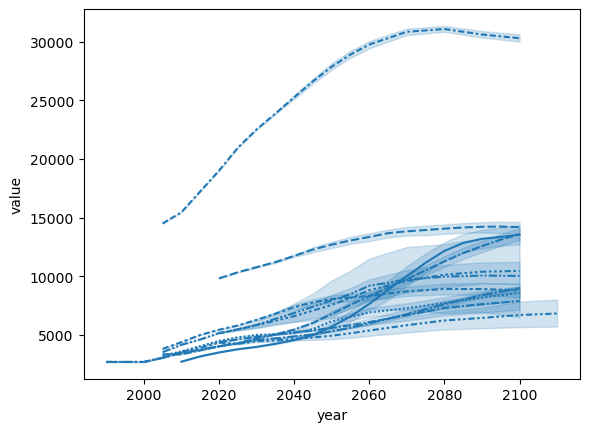

In [16]:
sns.lineplot(
    data=data.filter(variable="Agricultural Demand").data,
    x="year",
    y="value",
    # hue="model",
    style="model",
    legend=False,
)


<Axes: xlabel='year', ylabel='value'>

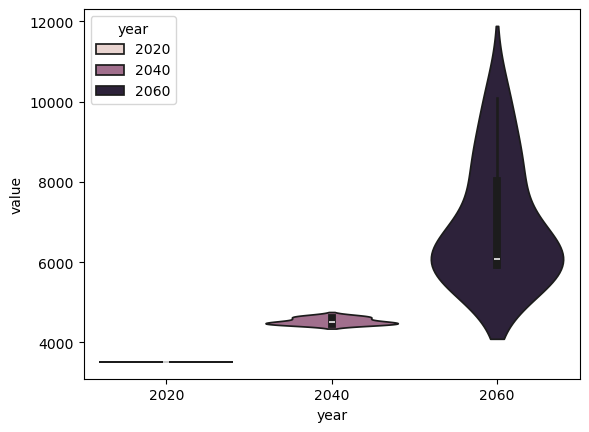

In [ ]:
sns.violinplot(
    data=data.filter(variable="Agricultural Demand", year=[2020, 2040, 2060]).data,
    y="value",
    x="year",
    hue="model",
)


In [35]:
data.filter(variable="Agricultural Demand", region="World").timeseries().describe().pipe(
    reshape_summary_data
)
# data.filter(variable="Agricultural Demand", region="World").plot(
#     kind="line",
#     x="year",
#     y="value",
#     color="scenario",
#     title="Agricultural Demand in World",
#     xlabel="Year",
#     ylabel="Agricultural Demand",
# )

,variables,year,value
0,count,1990,33.000000
1,mean,1990,2708.702282
2,std,1990,0.240442
3,min,1990,2708.523300
4,25%,1990,2708.523300
...,...,...,...
187,min,2110,4500.093744
188,25%,2110,4519.631078
189,50%,2110,7952.194749
190,75%,2110,8289.487056


In [ ]:
def apply_filter(df, filters):
    """
    Apply filters to a DataFrame.
    """
    for key, value in filters.items():
        if isinstance(value, list):
            df = df[df[key].isin(value)]
        else:
            df = df[df[key] == value]
    return df


def compute_enssemble_aggregation(df, filters):
    """
    Compute ensemble aggregation for a given DataFrame and filters.
    """
    filtered_df = apply_filter(df, filters)
    # Compute the mean value for each year
    mean_df = filtered_df.groupby("year").mean().reset_index()
    # Compute the median value for each year
    median_df = filtered_df.groupby("year").median().reset_index()
    return mean_df, median_df

### Visualization: flow 1, hunger and biodiversity


In [12]:
variables[
    variables["name"].str.contains("Hunger", case=False)
    | variables["name"].str.contains("biodiversity", case=False)
    ]

,name,id,created_at,created_by
170,Population|Risk of Hunger,171,2025-03-28T12:04:32.245190,@unknown
1065,Terrestrial Biodiversity|Shannon Crop Diversit...,1066,2025-04-07T11:32:05.677782,@unknown
1169,Terrestrial Biodiversity|Biodiversity Intactne...,1170,2025-04-09T07:54:50.497128,@unknown
1170,Terrestrial Biodiversity|Mean Species Abundanc...,1171,2025-04-09T07:54:50.544049,@unknown


In [ ]:
regions_available = create_df_from_api_response(
    client.get_data(
        "regions/",
        params={"table": "true"},
        body={"iamc": {"variable": {"id__in": [171, 1170]}}},
    )
)

regions_available

,name,hierarchy,id,created_at,created_by
0,World,common,318,2025-03-20 15:11:06.387377,@unknown
1,OECD & EU (R5),R5,321,2025-03-28 11:50:38.810880,@unknown
2,Reforming Economies (R5),R5,322,2025-03-28 11:50:38.858697,@unknown
3,Asia (R5),R5,323,2025-03-28 11:50:38.909370,@unknown
4,Middle East & Africa (R5),R5,324,2025-03-28 11:50:38.968712,@unknown
...,...,...,...,...,...
83,REMIND-MAgPIE 3.2-4.6|Non-EU28 Europe,REMIND-MAgPIE 3.2-4.6,574,2025-04-17 08:39:53.332686,@unknown
84,REMIND-MAgPIE 3.2-4.6|Other Asia,REMIND-MAgPIE 3.2-4.6,575,2025-04-17 08:39:53.375072,@unknown
85,REMIND-MAgPIE 3.2-4.6|Russia and Reforming Eco...,REMIND-MAgPIE 3.2-4.6,576,2025-04-17 08:39:53.425509,@unknown
86,REMIND-MAgPIE 3.2-4.6|Sub-Saharan Africa,REMIND-MAgPIE 3.2-4.6,577,2025-04-17 08:39:53.465847,@unknown


In [271]:
data = create_iamdf(
    create_df_from_api_response(
        client.get_data(
            "iamc/datapoints/",
            params={
                "join_parameters": "true",
                "join_runs": "true",
                "table": "true",
            },
            body={
                "variable": {"name__in": ["Population|Risk of Hunger"]},
                # "region": {"hierarchy": "R5"},
                "year__gte": 2020,
                "year__lte": 2100,
            },
        )
    )
)

data.filter(year=2020).data

,model,scenario,region,variable,unit,year,version,type,time_series__id,value
0,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,Africa (R10),Population|Risk of Hunger,million,2020,1,ANNUAL,150,191.0639
1,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,Asia (R5),Population|Risk of Hunger,million,2020,1,ANNUAL,354,320.6110
2,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,China+ (R10),Population|Risk of Hunger,million,2020,1,ANNUAL,549,47.6305
3,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,India+ (R10),Population|Risk of Hunger,million,2020,1,ANNUAL,946,136.7263
4,AIM/CGE V2.2,ENGAGE-INDCi2030-1000f,Latin America (R10),Population|Risk of Hunger,million,2020,1,ANNUAL,1146,34.6909
...,...,...,...,...,...,...,...,...,...,...
3446,REMIND-MAgPIE 3.2-4.6,SHAPE-SSP2-1.5°C,Reforming Economies (R10),Population|Risk of Hunger,million,2020,1,ANNUAL,3291982,4.5569
3447,REMIND-MAgPIE 3.2-4.6,SHAPE-SSP2-1.5°C,Reforming Economies (R5),Population|Risk of Hunger,million,2020,1,ANNUAL,3292633,4.5569
3448,REMIND-MAgPIE 3.2-4.6,SHAPE-SSP2-1.5°C,Rest of Asia (R10),Population|Risk of Hunger,million,2020,1,ANNUAL,3293284,169.6983
3449,REMIND-MAgPIE 3.2-4.6,SHAPE-SSP2-1.5°C,United States,Population|Risk of Hunger,million,2020,1,ANNUAL,3293955,3.6119


In [123]:
data.filter(year=2020).data.region.unique()


array(['Asia (R5)', 'Latin America (R5)', 'Middle East & Africa (R5)',
       'Reforming Economies (R5)', 'OECD & EU (R5)'], dtype=object)

In [86]:
thresholds = data.data[data.data.year == 2020][
    [
        "scenario",
        "region",
        "value",
    ]
].set_index(["scenario", "region"])
thresholds

value
scenario               region                               
ENGAGE-INDCi2030-1000f Asia (R5)                  320.611000
                       Latin America (R5)          34.690900
                       Middle East & Africa (R5)  210.203600
                       Reforming Economies (R5)     4.119000
ENGAGE-INDCi2030-1200  Asia (R5)                  320.611000
...                                                      ...
SHAPE-SSP2-1.5°C       Asia (R5)                  365.200006
                       Latin America (R5)          49.000000
                       Middle East & Africa (R5)  240.399999
                       OECD & EU (R5)               4.400000
                       Reforming Economies (R5)     9.100000

[711 rows x 1 columns]

In [88]:
test = data.data[["scenario", "region", "value", "year"]].set_index(["scenario", "region"])
test

value  year
scenario               region                                    
ENGAGE-INDCi2030-1000f Asia (R5)                 320.611000  2020
                       Asia (R5)                 259.687400  2025
                       Asia (R5)                 211.249900  2030
                       Asia (R5)                 185.884700  2035
                       Asia (R5)                 173.723100  2040
...                                                     ...   ...
SHAPE-SSP2-1.5°C       Reforming Economies (R5)   18.023420  2060
                       Reforming Economies (R5)   20.392542  2070
                       Reforming Economies (R5)   23.373189  2080
                       Reforming Economies (R5)   25.452786  2090
                       Reforming Economies (R5)   31.140591  2100

[9687 rows x 2 columns]

In [146]:
test_reset = test.reset_index()
thresholds_reset = thresholds.reset_index()
merged = pd.merge(
    test_reset, thresholds_reset, on=["scenario", "region"], suffixes=("", "_threshold")
)


In [148]:
merged[merged["value"] < merged["value_threshold"]].scenario.unique()


array(['ENGAGE-INDCi2030-1000f', 'ENGAGE-INDCi2030-1200',
       'ENGAGE-INDCi2030-1200f', 'ENGAGE-INDCi2030-1400',
       'ENGAGE-INDCi2030-1400f', 'ENGAGE-INDCi2030-1600',
       'ENGAGE-INDCi2030-1600f', 'ENGAGE-INDCi2030-1800',
       'ENGAGE-INDCi2030-1800f', 'ENGAGE-INDCi2030-800f',
       'ENGAGE-INDCi2030-900f', 'ENGAGE-INDCi2100', 'ENGAGE-NPi2020-1000',
       'ENGAGE-NPi2020-1000f', 'ENGAGE-NPi2020-1200',
       'ENGAGE-NPi2020-1200f', 'ENGAGE-NPi2020-1400',
       'ENGAGE-NPi2020-1400f', 'ENGAGE-NPi2020-1600',
       'ENGAGE-NPi2020-1600f', 'ENGAGE-NPi2020-1800',
       'ENGAGE-NPi2020-1800f', 'ENGAGE-NPi2020-300f',
       'ENGAGE-NPi2020-400f', 'ENGAGE-NPi2020-500f', 'ENGAGE-NPi2020-600',
       'ENGAGE-NPi2020-600f', 'ENGAGE-NPi2020-700', 'ENGAGE-NPi2020-700f',
       'ENGAGE-NPi2020-800', 'ENGAGE-NPi2020-800f', 'ENGAGE-NPi2020-900',
       'ENGAGE-NPi2020-900f', 'ENGAGE-NPi2100', 'ENGAGE-INDCi2030-1000',
       'ENGAGE-INDCi2030-1000-COV', 'ENGAGE-INDCi2030-1000-COV-NDCp'

<Axes: title={'center': 'Population at Risk of Hunger in R5 Regions'}, xlabel='Year', ylabel='Population at Risk of Hunger'>

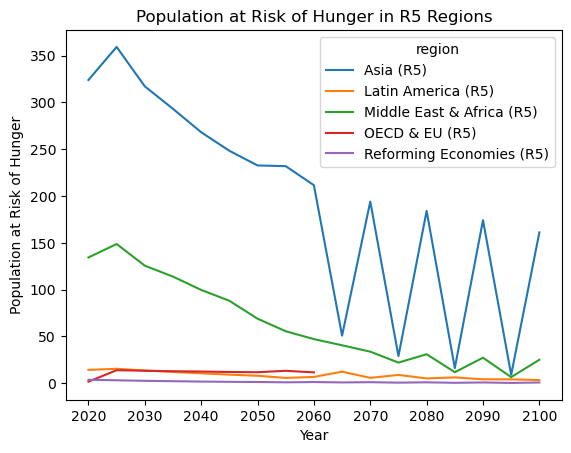

In [ ]:
merged[merged["value"] < merged["value_threshold"]].groupby(["region", "year"]).agg(
    {"value": "mean"}
).reset_index().sort_values(by=["region", "year"], ascending=[True, True]).pivot(
    index="year",
    columns="region",
    values="value",
).reset_index().plot.line(
    x="year",
    title="Population at Risk of Hunger in R5 Regions",
    xlabel="Year",
    ylabel="Population at Risk of Hunger",
)

In [69]:
thresholds.value

scenario                region                   
ENGAGE-INDCi2030-1000f  Asia (R5)                    320.611000
                        Latin America (R5)            34.690900
                        Middle East & Africa (R5)    210.203600
                        Reforming Economies (R5)       4.119000
ENGAGE-INDCi2030-1200   Asia (R5)                    320.611000
                                                        ...    
SHAPE-SSP2-1.5°C        Asia (R5)                    365.200006
                        Latin America (R5)            49.000000
                        Middle East & Africa (R5)    240.399999
                        OECD & EU (R5)                 4.400000
                        Reforming Economies (R5)       9.100000
Name: value, Length: 711, dtype: float64